In [1]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
import matplotlib.pyplot as plt

Using TensorFlow backend.
/home/allankim/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/allankim/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/allankim/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/allankim/anaconda3/lib/python3.7/site-packag

In [2]:
#pre-processing images taken from keras documentation
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
    'Images/DATASET/TRAIN',
    target_size=(128, 128),
    batch_size=1,
    class_mode='binary')

test_set = test_datagen.flow_from_directory(
    'Images/DATASET/TEST',
    target_size=(128, 128),
    batch_size=4,
    class_mode='binary')

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [3]:
# Initialising the CNN
classifier = Sequential()

# Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (128, 128, 3), activation = 'relu'))

# Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Flattening the Model
classifier.add(Flatten())

# Connecting all layer
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the model
classifier.compile(optimizer = 'sgd',
                  loss = 'binary_crossentropy',
                  metrics = ['accuracy'])


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [4]:
class1 = classifier.fit(
    training_set,
    epochs=100,
    validation_data=test_set)


Epoch 1/100
22564/22564 [==============================] - 100s 4ms/step - loss: 0.4940 - accuracy: 0.7795 - val_loss: 0.1512 - val_accuracy: 0.7640
Epoch 2/100
22564/22564 [==============================] - 100s 4ms/step - loss: 0.4435 - accuracy: 0.8089 - val_loss: 0.0202 - val_accuracy: 0.8201
Epoch 3/100
22564/22564 [==============================] - 98s 4ms/step - loss: 0.4031 - accuracy: 0.8306 - val_loss: 0.2728 - val_accuracy: 0.8786
Epoch 4/100
22564/22564 [==============================] - 99s 4ms/step - loss: 0.3816 - accuracy: 0.8389 - val_loss: 0.2285 - val_accuracy: 0.8870
Epoch 5/100
22564/22564 [==============================] - 100s 4ms/step - loss: 0.3652 - accuracy: 0.8483 - val_loss: 0.0554 - val_accuracy: 0.8969
Epoch 6/100
22564/22564 [==============================] - 102s 5ms/step - loss: 0.3526 - accuracy: 0.8564 - val_loss: 0.1688 - val_accuracy: 0.8993
Epoch 7/100
22564/22564 [==============================] - 102s 5ms/step - loss: 0.3436 - accuracy: 0.8588 

Epoch 54/100
22564/22564 [==============================] - 100s 4ms/step - loss: 0.1716 - accuracy: 0.9396 - val_loss: 0.0363 - val_accuracy: 0.8464
Epoch 55/100
22564/22564 [==============================] - 101s 4ms/step - loss: 0.1807 - accuracy: 0.9372 - val_loss: 0.1403 - val_accuracy: 0.8798
Epoch 56/100
22564/22564 [==============================] - 101s 4ms/step - loss: 0.1757 - accuracy: 0.9383 - val_loss: 1.9372e-04 - val_accuracy: 0.8778
Epoch 57/100
22564/22564 [==============================] - 99s 4ms/step - loss: 0.1692 - accuracy: 0.9418 - val_loss: 0.2551 - val_accuracy: 0.8886
Epoch 58/100
22564/22564 [==============================] - 99s 4ms/step - loss: 0.1705 - accuracy: 0.9420 - val_loss: 0.1419 - val_accuracy: 0.8790
Epoch 59/100
22564/22564 [==============================] - 100s 4ms/step - loss: 0.1768 - accuracy: 0.9388 - val_loss: 1.5484e-05 - val_accuracy: 0.8798
Epoch 60/100
22564/22564 [==============================] - 98s 4ms/step - loss: 0.1718 - accu

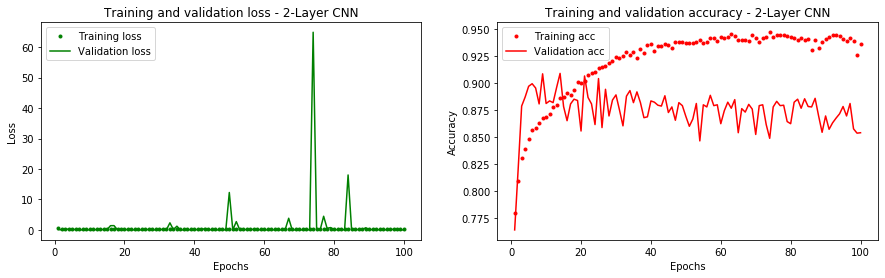

In [5]:
#Extracting CNN Results for Visualization
hist_cnn = class1.history
loss_values = hist_cnn['loss']
val_loss_values = hist_cnn['val_loss']
acc_values = hist_cnn['accuracy'] 
val_acc_values = hist_cnn['val_accuracy']


epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(15,4))
plt.subplot(121)
plt.plot(epochs, loss_values, 'g.', label='Training loss')
plt.plot(epochs, val_loss_values, 'g', label='Validation loss')

plt.title('Training and validation loss - 2-Layer CNN')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(122)
plt.plot(epochs, acc_values, 'r.', label='Training acc')
plt.plot(epochs, val_acc_values, 'r', label='Validation acc')
plt.title('Training and validation accuracy - 2-Layer CNN')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
# plt.savefig('Images/Model/cnn1.png')
plt.show()